In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RandomizedLasso
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def return_all_rows(x):
    pd.set_option('display.max_rows', len(x))
    return x
    pd.reset_option('display.max_rows')
    
def return_all_columns(x):
    pd.set_option('display.max_columns', len(x))
    return x.head(5)
    pd.reset_option('display.max_columns')

In [3]:
# Load training data
df = pd.read_csv('C:/Users/shane/Desktop/W205_Final/W205_Project/eda/df.csv')

In [4]:
# Clean - Train - Convert Labels
UpDown = preprocessing.LabelEncoder()
labels = UpDown.fit_transform(df.forward_twelve_month_return_up)

df['labels'] = labels

In [5]:
# df - Subset - Feature Variables Measuring Category
features = [
            'spcsrc_zscore', 'past_sixteen_month_return_up',
            'past_twentyfour_month_return_up', 'past_twenty_month_return_up',
            'tvol_zscore', 'past_thirtysix_month_return_up',
            'past_twentyeight_month_return_up', 'past_twelve_month_return_up',
            'past_thirtytwo_month_return_up', 'ivol_zscore',
            'past_eight_month_return_up', 'DIVYIELD_zscore',
            'sector__Financials', 'past_four_month_return_up', 'b_smb', 'ptb',
            'ps_zscore', 'ocf_lct_zscore', 'b_hml',
            'sector__Information Technology', 'curr_debt_zscore', 'b_mkt',
            'sector__Utilities', 'profit_lct_sector_zscore',
            'STDEV_sector_zscore', 'R2_sector_zscore', 'pe_op_basic_zscore',
            'pe_exi_zscore', 'pe_inc_zscore', 'PEG_1yrforward_zscore',
            'dvpsxm_zscore', 'b_umd', 'sector__Consumer Discretionary',
            'cash_debt_zscore', 'dvpspm_zscore', 'BUYPCT',
            'PEG_trailing_zscore', 'MEDREC', 'short_debt_sector_zscore',
            'MEANREC', 'PEG_ltgforward_zscore', 'HOLDPCT',
            'sector__Health Care', 'pcf_zscore', 'GProf_sector_zscore',
            'debt_at_sector_zscore', 'cash_lt_zscore', 'pe_op_dil_zscore',
            'rect_act_zscore', 'debt_assets_zscore', 'alpha_sector_zscore',
            'at_turn_zscore', 'accrual_zscore', 'SELLPCT', 'exret_zscore',
            'cash_conversion_zscore', 'sector__Consumer Staples',
            'gpm_sector_zscore', 'cash_ratio_sector_zscore', 'rd_sale_zscore',
            'adv_sale_sector_zscore', 'sector__Real Estate',
            'staff_sale_sector_zscore', 'sector__Telecommunication Services',
            'pretret_earnat_zscore', 'roa_zscore', 'int_debt_zscore',
            'invt_act_zscore', 'recup', 'int_totdebt_sector_zscore',
            'sector__Materials', 'rect_turn_zscore', 'october', 'curr_ratio',
            'january', 'sale_invcap_zscore', 'inv_turn_sector_zscore',
            'bm_sector_zscore', 'sector__Energy', 'quick_ratio',
            'aftret_invcapx_sector_zscore', 'pretret_noa_sector_zscore',
            'sale_equity_zscore', 'totdebt_invcap_zscore', 'december',
            'equity_invcap_zscore', 'sector__Industrials', 'aftret_eq_zscore',
            'CAPEI_sector_zscore', 'february', 'july', 'debt_invcap_zscore',
            'august', 'june', 'dpr_sector_zscore', 'de_ratio_zscore',
            'past_fifteen_month_return_up', 'past_seventeen_month_return_up',
            'past_nineteen_month_return_up', 'past_eighteen_month_return_up',
            'past_fourteen_month_return_up', 'past_twentyone_month_return_up',
            'past_twentythree_month_return_up',
            'past_twentyfive_month_return_up', 'past_twentytwo_month_return_up',
            'past_twentysix_month_return_up', 'past_thirtyfour_month_return_up',
            'past_thirtyfive_month_return_up',
            'past_twentyseven_month_return_up',
            'past_thirtythree_month_return_up', 'past_thirteen_month_return_up',
            'past_thirtyone_month_return_up', 'past_thirty_month_return_up',
            'past_twentynine_month_return_up', 'past_eleven_month_return_up',
            'past_ten_month_return_up', 'past_nine_month_return_up',
            'past_seven_month_return_up', 'dvrate_zscore',
            'past_six_month_return_up', 'past_five_month_return_up',
            'past_three_month_return_up', 'n', 'past_two_month_return_up',
            'past_one_month_return_up', 'lt_ppent_sector_zscore', 'spcsrc',
            'tvol', 'ivol', 'dvrate', 'DIVYIELD', 'b_smb_zscore',
            'spcsrc_sector_zscore', 'tvol_sector_zscore', 'ivol_sector_zscore',
            'ps', 'ocf_lct', 'curr_debt', 'b_hml_zscore', 'ptb_zscore',
            'ps_sector_zscore', 'ocf_lct_sector_zscore', 'b_mkt_zscore',
            'profit_lct_zscore', 'b_smb_sector_zscore', 'profit_lct',
            'pe_op_basic', 'n_zscore', 'cash_debt', 'PEG_1yrforward', 'pe_exi',
            'dvrate_sector_zscore', 'pe_inc', 'ptb_sector_zscore',
            'b_umd_zscore', 'DIVYIELD_sector_zscore',
            'pe_op_basic_sector_zscore', 'PEG_ltgforward',
            'pe_exi_sector_zscore', 'PEG_1yrforward_sector_zscore',
            'pe_inc_sector_zscore', 'PEG_trailing', 'dvpspm_sector_zscore',
            'dvpsxm_sector_zscore', 'dvpsxm', 'R2', 'dvpspm',
            'b_hml_sector_zscore', 'curr_debt_sector_zscore',
            'pcf_sector_zscore', 'R2_zscore', 'pcf', 'rect_act', 'pe_op_dil',
            'PEG_ltgforward_sector_zscore', 'short_debt',
            'PEG_trailing_sector_zscore', 'debt_assets', 'cash_lt', 'at_turn',
            'b_umd_sector_zscore', 'rect_act_sector_zscore', 'MEANREC_zscore',
            'MEDREC_sector_zscore', 'short_debt_zscore', 'GProf_zscore',
            'GProf', 'BUYPCT_zscore', 'BUYPCT_sector_zscore',
            'pe_op_dil_sector_zscore', 'cash_conversion', 'cash_ratio',
            'HOLDPCT_zscore', 'cash_conversion_sector_zscore', 'debt_at',
            'accrual', 'alpha', 'exret', 'STDEV_zscore', 'gpm',
            'cash_ratio_zscore', 'gpm_zscore', 'at_turn_sector_zscore',
            'exret_sector_zscore', 'lt_debt_sector_zscore',
            'cash_lt_sector_zscore', 'debt_at_zscore', 'roa', 'adv_sale_zscore',
            'MEANREC_sector_zscore', 'pretret_earnat', 'HOLDPCT_sector_zscore',
            'accrual_sector_zscore', 'n_sector_zscore', 'alpha_zscore',
            'int_debt', 'b_mkt_sector_zscore', 'roa_sector_zscore',
            'past_thirtyfour_month_return',
            'past_thirtytwo_month_return_sector_zscore',
            'past_thirtyfour_month_return_zscore', 'lt_debt',
            'past_thirtytwo_month_return_zscore', 'past_thirtysix_month_return',
            'recup_sector_zscore', 'STDEV', 'rd_sale_sector_zscore',
            'past_thirtytwo_month_return',
            'past_thirtyfour_month_return_sector_zscore', 'invt_act', 'rd_sale',
            'past_thirty_month_return', 'past_thirty_month_return_zscore',
            'adv_sale', 'past_thirtysix_month_return_zscore', 'SELLPCT_zscore',
            'int_totdebt', 'int_totdebt_zscore', 'cash_debt_sector_zscore',
            'past_thirty_month_return_sector_zscore',
            'debt_assets_sector_zscore', 'int_debt_sector_zscore', 'rect_turn',
            'recdown_zscore', 'past_twentynine_month_return_zscore',
            'recup_zscore', 'past_thirtyfive_month_return',
            'past_twentynine_month_return',
            'past_thirtysix_month_return_sector_zscore',
            'pretret_earnat_sector_zscore', 'past_thirtythree_month_return',
            'past_thirtythree_month_return_zscore',
            'past_twentynine_month_return_sector_zscore',
            'past_thirtyfive_month_return_zscore',
            'past_twentyone_month_return_sector_zscore', 'sale_invcap',
            'past_thirtyone_month_return', 'invt_act_sector_zscore',
            'sale_invcap_sector_zscore', 'curr_ratio_sector_zscore',
            'past_thirtyone_month_return_zscore', 'pretret_noa_zscore',
            'aftret_invcapx', 'aftret_invcapx_zscore',
            'past_twentysix_month_return_sector_zscore', 'pretret_noa',
            'past_thirtythree_month_return_sector_zscore', 'totdebt_invcap',
            'equity_invcap', 'staff_sale', 'debt_invcap',
            'past_twentyfour_month_return_sector_zscore',
            'sale_equity_sector_zscore',
            'past_twenty_month_return_sector_zscore', 'sale_equity',
            'past_twentysix_month_return_zscore',
            'past_thirtyfive_month_return_sector_zscore',
            'past_twentyone_month_return_zscore', 'aftret_eq_sector_zscore',
            'past_twenty_month_return_zscore', 'CAPEI',
            'past_twentysix_month_return', 'CAPEI_zscore', 'aftret_eq',
            'past_thirtyone_month_return_sector_zscore',
            'past_twenty_month_return', 'past_twentyone_month_return',
            'past_twentyseven_month_return_zscore', 'curr_ratio_zscore',
            'bm_zscore', 'past_twentyseven_month_return_sector_zscore',
            'past_twentyeight_month_return', 'totdebt_invcap_sector_zscore',
            'past_twelve_month_return_zscore', 'past_twentyseven_month_return',
            'inv_turn', 'past_four_month_return_sector_zscore', 'MEDREC_zscore',
            'past_twelve_month_return', 'de_ratio',
            'past_twentytwo_month_return_sector_zscore',
            'past_twentythree_month_return_sector_zscore',
            'past_twentyeight_month_return_zscore',
            'past_twelve_month_return_sector_zscore', 'inv_turn_zscore',
            'past_four_month_return_zscore',
            'past_twentyfive_month_return_sector_zscore',
            'past_four_month_return', 'intcov_ratio', 'intcov',
            'intcov_sector_zscore', 'intcov_ratio_zscore', 'intcov_zscore',
            'intcov_ratio_sector_zscore', 'equity_invcap_sector_zscore',
            'past_twentyfour_month_return_zscore', 'lt_debt_zscore',
            'quick_ratio_zscore', 'efftax', 'de_ratio_sector_zscore',
            'past_twentyfive_month_return_zscore',
            'past_fifteen_month_return_zscore', 'past_sixteen_month_return',
            'capital_ratio_sector_zscore', 'past_sixteen_month_return_zscore',
            'past_twentyfour_month_return', 'capital_ratio_zscore', 'cfm',
            'opmbd', 'npm', 'ptpm', 'opmad', 'npm_sector_zscore',
            'opmbd_sector_zscore', 'opmbd_zscore', 'ptpm_zscore',
            'opmad_zscore', 'opmad_sector_zscore', 'cfm_zscore',
            'ptpm_sector_zscore', 'npm_zscore', 'cfm_sector_zscore',
            'past_twentyfive_month_return', 'past_fourteen_month_return',
            'roce_zscore', 'roce', 'capital_ratio',
            'past_fourteen_month_return_zscore', 'aftret_equity_sector_zscore',
            'dltt_be_sector_zscore', 'past_twentythree_month_return_zscore',
            'roe', 'bm', 'roe_zscore', 'quick_ratio_sector_zscore', 'sale_nwc',
            'past_fifteen_month_return', 'efftax_zscore',
            'past_twentyeight_month_return_sector_zscore', 'sale_nwc_zscore',
            'sale_nwc_sector_zscore', 'dpr', 'fcf_ocf_sector_zscore',
            'past_eight_month_return_zscore', 'evm', 'efftax_sector_zscore',
            'past_eighteen_month_return', 'pay_turn_sector_zscore',
            'evm_zscore', 'dltt_be', 'past_eleven_month_return_zscore',
            'dltt_be_zscore', 'april', 'past_twentythree_month_return',
            'past_ten_month_return_zscore', 'past_eighteen_month_return_zscore',
            'past_seven_month_return_zscore',
            'past_twentytwo_month_return_zscore', 'past_eight_month_return',
            'past_ten_month_return', 'evm_sector_zscore',
            'past_seventeen_month_return_zscore', 'aftret_equity_zscore',
            'debt_invcap_sector_zscore', 'dpr_zscore',
            'past_eleven_month_return', 'past_six_month_return_zscore',
            'staff_sale_zscore', 'fcf_ocf_zscore',
            'past_twentytwo_month_return', 'fcf_ocf',
            'past_five_month_return_sector_zscore',
            'past_thirteen_month_return_zscore', 'past_seventeen_month_return',
            'aftret_equity', 'past_one_month_return_sector_zscore',
            'past_six_month_return', 'pay_turn',
            'past_three_month_return_zscore', 'recdown_sector_zscore',
            'pay_turn_zscore', 'past_nine_month_return_zscore', 'september',
            'SELLPCT_sector_zscore', 'past_thirteen_month_return',
            'debt_capital_zscore', 'march',
            'past_nineteen_month_return_sector_zscore', 'debt_capital', 'may',
            'past_seven_month_return',
            'past_sixteen_month_return_sector_zscore', 'roce_sector_zscore',
            'past_two_month_return_zscore', 'past_two_month_return',
            'past_fifteen_month_return_sector_zscore',
            'debt_capital_sector_zscore',
            'past_fourteen_month_return_sector_zscore',
            'debt_ebitda_sector_zscore', 'debt_ebitda',
            'past_three_month_return', 'past_eight_month_return_sector_zscore',
            'debt_ebitda_zscore', 'past_thirteen_month_return_sector_zscore',
            'past_nine_month_return', 'past_nineteen_month_return_zscore',
            'past_one_month_return', 'past_nineteen_month_return',
            'past_eleven_month_return_sector_zscore',
            'past_ten_month_return_sector_zscore',
            'past_five_month_return_zscore', 'november',
            'past_nine_month_return_sector_zscore',
            'past_seven_month_return_sector_zscore',
            'past_three_month_return_sector_zscore', 'rect_turn_sector_zscore',
            'past_one_month_return_zscore', 'lt_ppent',
            'past_eighteen_month_return_sector_zscore',
            'past_five_month_return', 'past_six_month_return_sector_zscore',
            'lt_ppent_zscore', 'past_seventeen_month_return_sector_zscore',
            'recdown', 'roe_sector_zscore',
            'past_two_month_return_sector_zscore'
            ]

In [6]:
# df - Subset - Dependent Variables Measuring Magniture
dependent = [
            'forward_one_month_return', 
            'forward_two_month_return', 
            'forward_three_month_return', 
            'forward_four_month_return', 
            'forward_five_month_return', 
            'forward_six_month_return', 
            'forward_seven_month_return', 
            'forward_eight_month_return', 
            'forward_nine_month_return', 
            'forward_ten_month_return', 
            'forward_eleven_month_return', 
            'forward_twelve_month_return', 
            'forward_thirteen_month_return', 
            'forward_fourteen_month_return', 
            'forward_fifteen_month_return', 
            'forward_sixteen_month_return', 
            'forward_seventeen_month_return', 
            'forward_eighteen_month_return', 
            'forward_nineteen_month_return', 
            'forward_twenty_month_return', 
            'forward_twentyone_month_return', 
            'forward_twentytwo_month_return', 
            'forward_twentythree_month_return', 
            'forward_twentyfour_month_return', 
            'forward_twentyfive_month_return', 
            'forward_twentysix_month_return', 
            'forward_twentyseven_month_return', 
            'forward_twentyeight_month_return', 
            'forward_twentynine_month_return', 
            'forward_thirty_month_return', 
            'forward_thirtyone_month_return', 
            'forward_thirtytwo_month_return', 
            'forward_thirtythree_month_return', 
            'forward_thirtyfour_month_return', 
            'forward_thirtyfive_month_return', 
            'forward_thirtysix_month_return'
    ]

In [7]:
# df - Subset - Dependent Variables Measuring Category (up or down)
dependent_binary = [
            'forward_one_month_return_up', 
            'forward_two_month_return_up', 
            'forward_three_month_return_up', 
            'forward_four_month_return_up', 
            'forward_five_month_return_up', 
            'forward_six_month_return_up', 
            'forward_seven_month_return_up', 
            'forward_eight_month_return_up', 
            'forward_nine_month_return_up', 
            'forward_ten_month_return_up', 
            'forward_eleven_month_return_up', 
            'forward_twelve_month_return_up', 
            'forward_thirteen_month_return_up', 
            'forward_fourteen_month_return_up', 
            'forward_fifteen_month_return_up', 
            'forward_sixteen_month_return_up', 
            'forward_seventeen_month_return_up', 
            'forward_eighteen_month_return_up', 
            'forward_nineteen_month_return_up', 
            'forward_twenty_month_return_up', 
            'forward_twentyone_month_return_up', 
            'forward_twentytwo_month_return_up', 
            'forward_twentythree_month_return_up', 
            'forward_twentyfour_month_return_up', 
            'forward_twentyfive_month_return_up', 
            'forward_twentysix_month_return_up', 
            'forward_twentyseven_month_return_up', 
            'forward_twentyeight_month_return_up', 
            'forward_twentynine_month_return_up', 
            'forward_thirty_month_return_up', 
            'forward_thirtyone_month_return_up', 
            'forward_thirtytwo_month_return_up', 
            'forward_thirtythree_month_return_up', 
            'forward_thirtyfour_month_return_up', 
            'forward_thirtyfive_month_return_up', 
            'forward_thirtysix_month_return_up'
    ]

In [8]:
# df - Subset - Sectors
sector = [
            'Industrials',
            'Materials',
            'Consumer Discretionary',
            'Information Technology', 
            'Health Care', 
            'Utilities', 
            'Financials',
            'Energy',
            'Telecommunication Services', 
            'Consumer Staples',
            'Real Estate'
            ]

In [42]:
# df - Analysis - Measure Feature Importance
model = ExtraTreesClassifier()
model.fit(df[features], df['forward_twelve_month_return_up'])
feature_weight = list(model.feature_importances_)

{0.0035405227840819009, 0.0022962682511096363, 0.0019017065560245339, 0.0025749531644621289, 0.0019921227017176964, 0.0024251241516673179, 0.00022510405618095505, 0.0022703202219265558, 0.0023127839916999072, 0.0017282424023301972, 0.0022747796175500005, 0.0029126325893101129, 0.0021997775557141435, 0.0010854385684880186, 0.0022980678178834884, 0.0024876105600669047, 0.0021082181768621805, 0.0027239027752106698, 0.0025339626241703246, 0.0029598565549778231, 0.002142180096632861, 0.0040752724201463296, 0.001069668596275504, 0.0022303925976530736, 0.0027471873431262474, 0.0017431800922667756, 0.0022042009211552128, 0.0023514088673755786, 0.0027191123440336237, 0.0022951949126693524, 0.0026512463087967402, 0.002632633905520355, 0.0023549742860647723, 0.0021124339108836519, 0.0021827594949322773, 0.00179396288609644, 0.0017839905223625391, 0.0023844043987973759, 0.00099474491868543967, 0.0019082616832363105, 0.0032991243552667948, 0.0023535987975328229, 0.0028251186012379021, 0.00236983353

In [44]:
# df - Clean - Match and Sort Feature Importance
length = len(features)

feature_name = []
weight = []

for n in range(length):
    feature_name.append(features[n])
    weight.append(feature_weight[n])
    
feature_rank = pd.DataFrame()
feature_rank['feature'] = feature_name
feature_rank['weight'] = weight

# Sort from largest weight to smallest
return_all_rows(feature_rank.sort_values('weight', ascending=0))

spcsrc_zscore : 0.0122512268046
past_sixteen_month_return_up : 0.00169678969083
past_twentyfour_month_return_up : 0.00139016990278
past_twenty_month_return_up : 0.00102334641633
tvol_zscore : 0.00355113432313
past_thirtysix_month_return_up : 0.00155790992483
past_twentyeight_month_return_up : 0.00117895373304
past_twelve_month_return_up : 0.00143579540351
past_thirtytwo_month_return_up : 0.00221581632697
ivol_zscore : 0.00336226527037
past_eight_month_return_up : 0.00143357044954
DIVYIELD_zscore : 0.00207365368514
sector__Financials : 0.00537156204755
past_four_month_return_up : 0.00153441604534
b_smb : 0.00285361218494
ptb : 0.00354052278408
ps_zscore : 0.00272390277521
ocf_lct_zscore : 0.00238086916422
b_hml : 0.00274158537343
sector__Information Technology : 0.00235141180697
curr_debt_zscore : 0.00287764864276
b_mkt : 0.00295985655498
sector__Utilities : 0.000609967713693
profit_lct_sector_zscore : 0.00221701678834
STDEV_sector_zscore : 0.00282245737177
R2_sector_zscore : 0.00292240

In [47]:
feature_rank.feature.unique()

array(['spcsrc_zscore', 'past_sixteen_month_return_up',
       'past_twentyfour_month_return_up', 'past_twenty_month_return_up',
       'tvol_zscore', 'past_thirtysix_month_return_up',
       'past_twentyeight_month_return_up', 'past_twelve_month_return_up',
       'past_thirtytwo_month_return_up', 'ivol_zscore',
       'past_eight_month_return_up', 'DIVYIELD_zscore',
       'sector__Financials', 'past_four_month_return_up', 'b_smb', 'ptb',
       'ps_zscore', 'ocf_lct_zscore', 'b_hml',
       'sector__Information Technology', 'curr_debt_zscore', 'b_mkt',
       'sector__Utilities', 'profit_lct_sector_zscore',
       'STDEV_sector_zscore', 'R2_sector_zscore', 'pe_op_basic_zscore',
       'pe_exi_zscore', 'pe_inc_zscore', 'PEG_1yrforward_zscore',
       'dvpsxm_zscore', 'b_umd', 'sector__Consumer Discretionary',
       'cash_debt_zscore', 'dvpspm_zscore', 'BUYPCT',
       'PEG_trailing_zscore', 'MEDREC', 'short_debt_sector_zscore',
       'MEANREC', 'PEG_ltgforward_zscore', 'HOLDPCT',
 

In [45]:
feature_rank = pd.DataFrame()
feature_rank['feature'] = feature_name
feature_rank['weight'] = weight

# Sort from largest weight to smallest
return_all_rows(feature_rank.sort_values('weight', ascending=0))

,feature,weight
0,spcsrc_zscore,0.012251
110,past_thirteen_month_return_up,0.005677
126,spcsrc,0.005619
12,sector__Financials,0.005372
97,past_seventeen_month_return_up,0.005254
122,n,0.004396
252,past_thirtythree_month_return_zscore,0.004075
104,past_twentytwo_month_return_up,0.004046
353,bm,0.003787
127,tvol,0.003556


In [5]:
# df - Subset - Manually Selected Features Based on Correlation and Uniqueness
my_features = [
            'spcsrc_zscore',
            'tvol_zscore',
            'ivol_zscore',
            'dvrate_zscore',
            'DIVYIELD_zscore',
            'b_smb',
            'n',
            'ptb',
            'ps_zscore',
            'ocf_lct_zscore',
            'b_hml',
            'curr_debt_zscore',
            'b_mkt',
            'STDEV_sector_zscore',
            'profit_lct_sector_zscore',
            'R2_sector_zscore',
            'pe_op_basic_zscore',
            'BUYPCT',
            'pe_exi_zscore',
            'MEDREC',
            'pe_inc_zscore',
            'PEG_1yrforward_zscore',
            'HOLDPCT',
            'dvpsxm_zscore',
            'b_umd',
            'cash_debt_zscore',
            'MEANREC',
            'dvpspm_zscore',
            'PEG_trailing_zscore',
            'short_debt_sector_zscore',
            'PEG_ltgforward_zscore',
            'pcf_zscore',
            'GProf_sector_zscore',
            'debt_at_sector_zscore',
            'cash_lt_zscore',
            'pe_op_dil_zscore',
            'rect_act_zscore',
            'debt_assets_zscore',
            'alpha_sector_zscore',
            'at_turn_zscore',
            'accrual_zscore',
            'exret_zscore',
            'cash_conversion_zscore',
            'gpm_sector_zscore',
            'cash_ratio_sector_zscore',
            'rd_sale_zscore',
            'SELLPCT',
            'adv_sale_sector_zscore',
            'staff_sale_sector_zscore',
            'pretret_earnat_zscore',
            'roa_zscore',
            'int_debt_zscore',
            'recup',
            'past_thirtytwo_month_return_sector_zscore',
            'past_thirtysix_month_return',
            'invt_act_zscore',
            'int_totdebt_sector_zscore',
            'rect_turn_zscore',
            'october',
            'curr_ratio',
            'january',
            'sale_invcap_zscore',
            'inv_turn_sector_zscore',
            'bm_sector_zscore',
            'quick_ratio',
            'aftret_invcapx_sector_zscore',
            'pretret_noa_sector_zscore',
            'sale_equity_zscore',
            'totdebt_invcap_zscore',
            'december',
            'equity_invcap_zscore',
            'past_twenty_month_return_sector_zscore',
            'aftret_eq_zscore',
            'CAPEI_sector_zscore',
            'february',
            'july',
            'debt_invcap_zscore',
            'august',
            'june',
            'past_four_month_return_sector_zscore',
            'dpr_sector_zscore',
            'past_twelve_month_return',
            'de_ratio_zscore',
            'past_twentyeight_month_return_zscore',
            'lt_ppent_sector_zscore'
    ]

In [62]:
log_accuracy = []
log_log_loss = []
bnb_accuracy = []
bnb_log_loss = []
rf_accuracy = []
rf_log_loss = []
ab_accuracy = []
ab_log_loss = []
gtb_accuracy = []
gtb_log_loss = []

# Train - Split - Reduce Dataset Size
sample_A, dump = train_test_split(df, train_size=0.25)

sample_train, sample_test = train_test_split(sample_A, train_size=0.7)

for n in range(4, 200, 5):
    
    select_features = features[:(n+1)]
    
    print(n+1, "Features")
    
    # Logistic Regression
    model = LogisticRegression()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    log_accuracy.append(accuracy)
    log_log_loss.append(ll)
    print("Logistic Regression accuracy:", accuracy)
    print("Logistic Regression log loss:", ll, "\n")
    
    # Bernoulli Naive Bayes
    model = BernoulliNB()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    bnb_accuracy.append(accuracy)
    bnb_log_loss.append(ll)
    print("Bernoulli Naive Bayes accuracy:", accuracy)
    print("Bernoulli Naive Bayes log loss:", ll, "\n")

    # Random Forests
    model = RandomForestClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    rf_accuracy.append(accuracy)
    rf_log_loss.append(ll)
    print("Random Forests accuracy:", accuracy)
    print("Random Forests log loss:", ll, "\n")
    
    # Adaptive Boosting
    model = AdaBoostClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    ab_accuracy.append(accuracy)
    ab_log_loss.append(ll)
    print("Adaptive Boosting accuracy:", accuracy)
    print("Adaptive Boosting log loss:", ll, "\n")
    
    # Gradient Tree Boosting
    model = GradientBoostingClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    gtb_accuracy.append(accuracy)
    gtb_log_loss.append(ll)
    print("Gradient Tree Boosting accuracy:", accuracy)
    print("Gradient Tree Boosting log loss:", ll, "\n")

5 Features
Logistic Regression accuracy: 0.602044905819
Logistic Regression log loss: 0.661653233114 

Bernoulli Naive Bayes accuracy: 0.590295494756
Bernoulli Naive Bayes log loss: 0.7008889377 

Random Forests accuracy: 0.548977058346
Random Forests log loss: 5.29581096852 

Adaptive Boosting accuracy: 0.602093780241
Adaptive Boosting log loss: 0.691764203367 

Gradient Tree Boosting accuracy: 0.605495440016
Gradient Tree Boosting log loss: 0.658803015748 

10 Features
Logistic Regression accuracy: 0.605143544178
Logistic Regression log loss: 0.659883086221 

Bernoulli Naive Bayes accuracy: 0.592436194442
Bernoulli Naive Bayes log loss: 0.869907959816 

Random Forests accuracy: 0.608506104415
Random Forests log loss: 1.80378269476 

Adaptive Boosting accuracy: 0.606091707966
Adaptive Boosting log loss: 0.691722488763 

Gradient Tree Boosting accuracy: 0.609297870053
Gradient Tree Boosting log loss: 0.656691767693 

15 Features
Logistic Regression accuracy: 0.609268545399
Logistic Reg

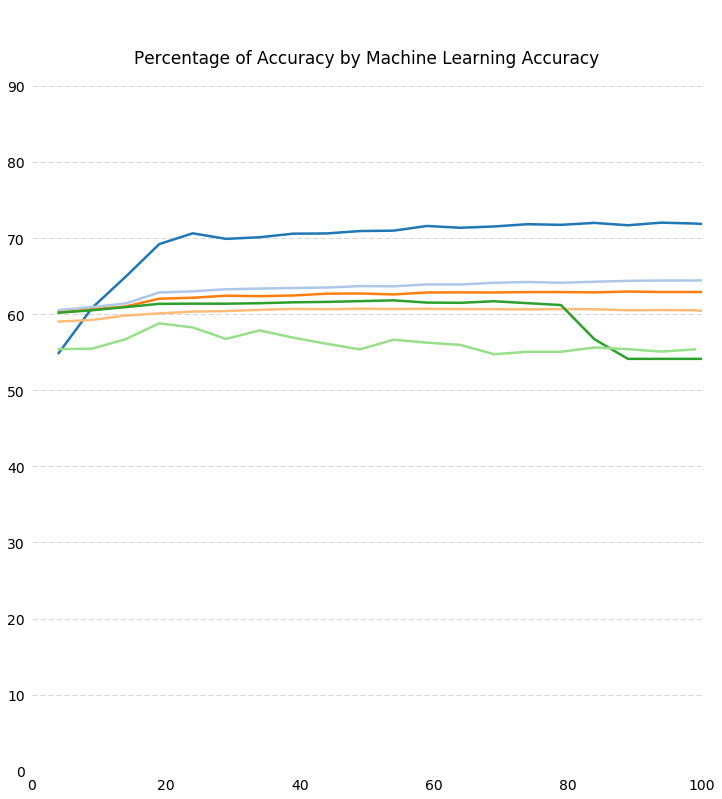

In [84]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
      
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 100)    
plt.xlim(0, 100)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 100, 10), [str(x) for x in range(0, 100, 10)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(10, 99, 10):    
    plt.plot(range(0, 200), [y] * len(range(0, 200)), "--", lw=0.5, color="black", alpha=0.3)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

rf_percentage = []
gtb_percentage = []
ab_percentage = []
bnb_percentage = []
lr_percentage = []
knn_percentage = []

rf_percentage = [i * 100 for i in rf_accuracy]
gtb_percentage = [i * 100 for i in gtb_accuracy]
ab_percentage = [i * 100 for i in ab_accuracy]
bnb_percentage = [i * 100 for i in bnb_accuracy]
log_percentage = [i * 100 for i in log_accuracy]
knn_percentage = [i * 100 for i in knn_accuracy]
    
algorithms = ['Random Forests', 'Gradient Tree Boosting', 'Adaptive Boosting', 'Bernoulli Naive Bayes',
              'Logisitic Regression']    
  
plt.plot(range(4, 200, 5), rf_percentage, lw=2.5, color=tableau20[0])
plt.plot(range(4, 200, 5), gtb_percentage, lw=2.5, color=tableau20[1])
plt.plot(range(4, 200, 5), ab_percentage, lw=2.5, color=tableau20[2])
plt.plot(range(4, 200, 5), bnb_percentage, lw=2.5, color=tableau20[3])
plt.plot(range(4, 200, 5), log_percentage, lw=2.5, color=tableau20[4])
plt.plot(range(4, 100, 5), knn_percentage, lw=2.5, color=tableau20[5])

plt.text(50, 93, "Percentage of Accuracy by Machine Learning Accuracy", fontsize=17, ha="center")

plt.savefig("algorithm_accuracy.png", bbox_inches="tight") 

In [79]:
knn_accuracy = []
knn_log_loss = []
lr_accuracy = []
lr_mae = []
rr_accuracy = []
rr_mae = []

# Train - Split - Reduce Dataset Size
sample_A, dump = train_test_split(df, train_size=0.01)

sample_train, sample_test = train_test_split(sample_A, train_size=0.7)

for n in range(4, 100, 5):
    
    select_features = features[:(n+1)]
    
    print(n+1, "Features")
    
    # Linear Regression 
    model = LinearRegression()
    model.fit(sample_train[select_features], sample_train['forward_twelve_month_return'])
    predicted = np.array(model.predict(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['forward_twelve_month_return'])
    mae = mean_absolute_error(sample_test['forward_twelve_month_return'], predicted)
    lr_accuracy.append(accuracy)
    lr_mae.append(mae)
    print("Linear Regression accuracy:", accuracy)
    print("Linear Regression mean absolute error:", mae, "\n")
    
    # Ridge Regression 
    model = LinearRegression()
    model.fit(sample_train[select_features], sample_train['forward_twelve_month_return'])
    predicted = np.array(model.predict(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['forward_twelve_month_return'])
    mae = mean_absolute_error(sample_test['forward_twelve_month_return'], predicted)
    rr_accuracy.append(accuracy)
    rr_mae.append(mae)
    print("Ridge Regression accuracy:", accuracy)
    print("Ridge Regression mean absolute error:", mae, "\n")
    
    # K-Nearest Neighbors
    model = KNeighborsClassifier()
    model.fit(sample_train[select_features], sample_train['labels'])
    predicted = np.array(model.predict_proba(sample_test[select_features]))
    accuracy = model.score(sample_test[select_features], sample_test['labels'])
    ll = log_loss(sample_test['labels'], predicted)
    knn_accuracy.append(accuracy)
    knn_log_loss.append(ll)
    print("K-Nearest Neighbors accuracy:", accuracy)
    print("K-Nearest Neighbors log loss:", ll, "\n")

5 Features
Linear Regression accuracy: -11.8851893982
Linear Regression mean absolute error: 622.362120572 

Ridge Regression accuracy: -11.8851893982
Ridge Regression mean absolute error: 622.362120572 

K-Nearest Neighbors accuracy: 0.554007820137
K-Nearest Neighbors log loss: 2.15851699366 

10 Features
Linear Regression accuracy: -13.4407532729
Linear Regression mean absolute error: 652.445535931 

Ridge Regression accuracy: -13.4407532729
Ridge Regression mean absolute error: 652.445535931 

K-Nearest Neighbors accuracy: 0.554740957967
K-Nearest Neighbors log loss: 2.12780236321 

15 Features
Linear Regression accuracy: -28.8197942451
Linear Regression mean absolute error: 903.18207438 

Ridge Regression accuracy: -28.8197942451
Ridge Regression mean absolute error: 903.18207438 

K-Nearest Neighbors accuracy: 0.567204301075
K-Nearest Neighbors log loss: 2.13024319566 

20 Features
Linear Regression accuracy: -33.434111077
Linear Regression mean absolute error: 970.641757018 

Rid

In [82]:
all_rf_accuracy = []
all_rf_log_loss = []
all_ab_accuracy = []
all_ab_log_loss = []
all_gtb_accuracy = []
all_gtb_log_loss = []

# Train - Split - Reduce Dataset Size

for n in range(9, 150, 10):
    
    select_features = features[:(n+1)]
    
    print(n+1, "Features")
    
    # Random Forests
    model = RandomForestClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_rf_accuracy.append(accuracy)
    all_rf_log_loss.append(ll)
    print("Random Forests accuracy:", accuracy)
    print("Random Forests log loss:", ll, "\n")
    
    # Adaptive Boosting
    model = AdaBoostClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_ab_accuracy.append(accuracy)
    all_ab_log_loss.append(ll)
    print("Adaptive Boosting accuracy:", accuracy)
    print("Adaptive Boosting log loss:", ll, "\n")
    
    # Gradient Tree Boosting
    model = GradientBoostingClassifier()
    model.fit(train[select_features], train['labels'])
    predicted = np.array(model.predict_proba(test[select_features]))
    accuracy = model.score(test[select_features], test['labels'])
    ll = log_loss(test['labels'], predicted)
    all_gtb_accuracy.append(accuracy)
    all_gtb_log_loss.append(ll)
    print("Gradient Tree Boosting accuracy:", accuracy)
    print("Gradient Tree Boosting log loss:", ll, "\n")

10 Features
Random Forests accuracy: 0.65610490406
Random Forests log loss: 1.72574274047 

Adaptive Boosting accuracy: 0.608911762118
Adaptive Boosting log loss: 0.691682001619 

Gradient Tree Boosting accuracy: 0.612276766077
Gradient Tree Boosting log loss: 0.655317895799 

20 Features
Random Forests accuracy: 0.807461658016
Random Forests log loss: 0.576210184701 

Adaptive Boosting accuracy: 0.623019364046
Adaptive Boosting log loss: 0.691165540175 

Gradient Tree Boosting accuracy: 0.631125186945
Gradient Tree Boosting log loss: 0.640668112364 

30 Features
Random Forests accuracy: 0.826534901225
Random Forests log loss: 0.535477863718 

Adaptive Boosting accuracy: 0.624747074866
Adaptive Boosting log loss: 0.691096259647 

Gradient Tree Boosting accuracy: 0.635536103536
Gradient Tree Boosting log loss: 0.637747288314 

40 Features
Random Forests accuracy: 0.835689080477
Random Forests log loss: 0.521942983921 

Adaptive Boosting accuracy: 0.625502184687
Adaptive Boosting log los

KeyboardInterrupt: 

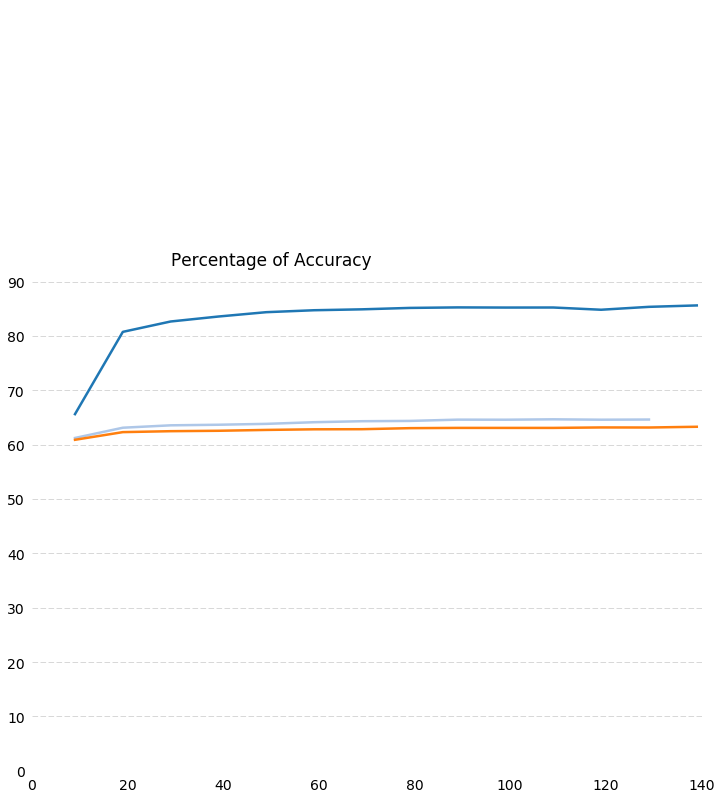

In [89]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    
      
plt.figure(figsize=(12, 14))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 140)    
plt.xlim(0, 140)    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(range(0, 100, 10), [str(x) for x in range(0, 100, 10)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
for y in range(10, 99, 10):    
    plt.plot(range(0, 200), [y] * len(range(0, 200)), "--", lw=0.5, color="black", alpha=0.3)
    
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")

all_rf_percentage = []
all_gtb_percentage = []
all_ab_percentage = []

all_rf_percentage = [i * 100 for i in all_rf_accuracy]
all_gtb_percentage = [i * 100 for i in all_gtb_accuracy]
all_ab_percentage = [i * 100 for i in all_ab_accuracy]
    
algorithms = ['Random Forests', 'Gradient Tree Boosting', 'Adaptive Boosting']    
  
plt.plot(range(9, 140, 10), all_rf_percentage, lw=2.5, color=tableau20[0])
plt.plot(range(9, 130, 10), all_gtb_percentage, lw=2.5, color=tableau20[1])
plt.plot(range(9, 140, 10), all_ab_percentage, lw=2.5, color=tableau20[2])

plt.text(50, 93, "Percentage of Accuracy", fontsize=17, ha="center")

plt.savefig("algorithm_accuracy2.png", bbox_inches="tight") 

In [18]:
# df - Subset # 2 - Manually Selected Features Based on Correlation and Uniqueness

features_two = [
                'spcsrc_zscore',
                'tvol_zscore',
                'ivol_zscore',
                'dvrate_zscore',
                'DIVYIELD_zscore',
                'b_smb',
                'n',
                'ptb',
                'ps_zscore',
                'ocf_lct_zscore',
                'b_hml',
                'curr_debt_zscore',
                'b_mkt',
                'STDEV_sector_zscore',
                'profit_lct_sector_zscore',
                'R2_sector_zscore',
                'pe_op_basic_zscore',
                'BUYPCT',
                'pe_exi_zscore',
                'MEDREC',
                'pe_inc_zscore',
                'PEG_1yrforward_zscore',
                'HOLDPCT',
                'dvpsxm_zscore',
                'b_umd',
                'cash_debt_zscore',
                'MEANREC',
                'dvpspm_zscore',
                'PEG_trailing_zscore',
                'short_debt_sector_zscore',
                'PEG_ltgforward_zscore',
                'pcf_zscore'
                ]

In [12]:
pca_components = []
lr_accuracy = []
lr_mae = []
rr_accuracy = []
rr_mae = []
log_accuracy = []
log_log_loss = []
bnb_accuracy = []
bnb_log_loss = []
mbnb_accuracy = []
mbnb_log_loss = []
gnb_accuracy = []
gnb_log_loss = []
rf_accuracy = []
rf_log_loss = []
knn_accuracy = []
knn_log_loss = []
ab_accuracy = []G
ab_log_loss = []
gtb_accuracy = []
gtb_log_loss = []

for n in range(1,101):

    pca = PCA(n_components = n)
    train_pca = pca.fit_transform(train[features])
    test_pca = pca.transform(test[features])
    pca_components.append(n)
    print("PCA Components:", n, "\n")
    
    # Linear Regression 
    model = LinearRegression()
    model.fit(train_pca, train['forward_twelve_month_return'])
    predicted = np.array(model.predict(test_pca))
    accuracy = model.score(test_pca, test['forward_twelve_month_return'])
    mae = mean_absolute_error(test['forward_twelve_month_return'], predicted)
    lr_accuracy.append(accuracy)
    lr_mae.append(accuracy)
    print("Linear Regression accuracy:", accuracy)
    print("Linear Regression mean absolute error:", mae, "\n")
    
    # Ridge Regression 
    model = LinearRegression()
    model.fit(train_pca, train['forward_twelve_month_return'])
    predicted = np.array(model.predict(test_pca))
    accuracy = model.score(test_pca, test['forward_twelve_month_return'])
    mae = mean_absolute_error(test['forward_twelve_month_return'], predicted)
    rr_accuracy.append(accuracy)
    rr_mae.append(accuracy)
    print("Ridge Regression accuracy:", accuracy)
    print("Ridge Regression mean absolute error:", mae, "\n")
    
    # Logistic Regression
    model = LogisticRegression()
    model.fit(train_pca, train['labels'])
    predicted = np.array(model.predict_proba(test_pca))
    accuracy = model.score(test_pca, test['labels'])
    ll = log_loss(test['labels'], predicted)
    log_accuracy.append(accuracy)
    log_log_loss.append(accuracy)
    print("Logistic Regression accuracy:", accuracy)
    print("Logistic Regression log loss:", ll, "\n")
    
    # Bernoulli Naive Bayes
    model = BernoulliNB()
    model.fit(train_pca, train['labels'])
    predicted = np.array(model.predict_proba(test_pca))
    accuracy = model.score(test_pca, test['labels'])
    ll = log_loss(test['labels'], predicted)
    bnb_accuracy.append(accuracy)
    bnb_log_loss.append(accuracy)
    print("Bernoulli Naive Bayes accuracy:", accuracy)
    print("Bernoulli Naive Bayes log loss:", ll, "\n")

    # Random Forests
    model = RandomForestClassifier()
    model.fit(train_pca, train['labels'])
    predicted = np.array(model.predict_proba(test_pca))
    accuracy = model.score(test_pca, test['labels'])
    ll = log_loss(test['labels'], predicted)
    rf_accuracy.append(accuracy)
    rf_log_loss.append(accuracy)
    print("Random Forests accuracy:", accuracy)
    print("Random Forests log loss:", ll, "\n")
    
    # K-Nearest Neighbors
    model = KNeighborsClassifier()
    model.fit(train_pca, train['labels'])
    predicted = np.array(model.predict_proba(test_pca))
    accuracy = model.score(test_pca, test['labels'])
    ll = log_loss(test['labels'], predicted)
    knn_accuracy.append(accuracy)
    knn_log_loss.append(accuracy)
    print("K-Nearest Neighbors accuracy:", accuracy)
    print("K-Nearest Neighbors log loss:", ll, "\n")
    
    # Adaptive Boosting
    model = AdaBoostClassifier()
    model.fit(train_pca, train['labels'])
    predicted = np.array(model.predict_proba(test_pca))
    accuracy = model.score(test_pca, test['labels'])
    ll = log_loss(test['labels'], predicted)
    ab_accuracy.append(accuracy)
    ab_log_loss.append(accuracy)
    print("Adaptive Boosting accuracy:", accuracy)
    print("Adaptive Boosting log loss:", ll, "\n")
    
    # Gradient Tree Boosting
    model = GradientBoostingClassifier(n_estimators=100)
    model.fit(train_pca, train['labels'])
    predicted = np.array(model.predict_proba(test_pca))
    accuracy = model.score(test_pca, test['labels'])
    ll = log_loss(test['labels'], predicted)
    gtb_accuracy.append(accuracy)
    gtb_log_loss.append(accuracy)
    print("Gradient Tree Boosting accuracy:", accuracy)
    print("Gradient Tree Boosting log loss:", ll, "\n")

PCA Components: 1 

Linear Regression accuracy: -6.63019723044e-05
Linear Regression mean absolute error: 64.8644242571 

Ridge Regression accuracy: -6.63019723044e-05
Ridge Regression mean absolute error: 64.8644242571 

Logistic Regression accuracy: 0.452692003167
Logistic Regression log loss: 0.693145896497 

Bernoulli Naive Bayes accuracy: 0.547310440554
Bernoulli Naive Bayes log loss: 0.688664137392 

Random Forests accuracy: 0.547337321486
Random Forests log loss: 0.688640042849 

K-Nearest Neighbors accuracy: 0.4757631741
K-Nearest Neighbors log loss: 2.58581527977 

Adaptive Boosting accuracy: 0.547337321486
Adaptive Boosting log loss: 0.6929690551 

Gradient Tree Boosting accuracy: 0.547337321486
Gradient Tree Boosting log loss: 0.688644130757 

PCA Components: 2 

Linear Regression accuracy: -6.63018764246e-05
Linear Regression mean absolute error: 64.864426854 

Ridge Regression accuracy: -6.63018764246e-05
Ridge Regression mean absolute error: 64.864426854 

Logistic Regres

KeyboardInterrupt: 

In [9]:
# df - Subset - Features vs Dependent (Magnitude)
# X_magnitude, y_magnitude = df[features], df[dependent]

In [10]:
# df - Subset - Features vs Dependent (Categorical)
# X_categorical, y_categorical = df[features], df[dependent]

In [81]:
# df - Split - Train/Test Datasets
train, test = train_test_split(df, train_size=0.7)

In [ ]:
# df - Analysis - Best Number of Features for Linear Regression
feature_count = []
r2_score = []
r2_score_predicted = []
feature_list_end = []

columns = train[features].columns

for n in range(400):
    clf = Ridge()
    k = (n+1)
    best = SelectKBest(score_func=f_regression, k=k)
    best.fit(train[features], train['forward_twelve_month_return'])
    X_train = best.transform(train[features])
    X_test = best.transform(test[features])

    # Fit Model
    clf.fit(X_train, train['forward_twelve_month_return'])
    score_train = clf.score(X_train, train['forward_twelve_month_return'])
    score = clf.score(X_test, test['forward_twelve_month_return'])
    
    # List of Features
    feature_list = [columns[x] for x in best.get_support(indices=True) if x]
    new_feature = set(feature_list) - set(feature_list_end)
    feature_list_end = feature_list
    
    # Output
    print("R2:", score," (predicted:", score_train,") - new feature added," , new_feature, "making", k, "selected features:", feature_list_end, "\n")
    
    feature_count.append(k)
    r2_score.append(score)
    r2_score_predicted(score_train)

In [ ]:
# Total Amount of Variance Explained By Pricipal Components

x = []
y = []

# Iterate through the first k principal components, for k in [1, 10]
for k in range(1, 10):

    # Fit Principal Components Analysis
    pca = PCA(n_components = k)
    pca.fit(train[features])

    # Record the cumulative sum
    cumulative = sum(pca.explained_variance_ratio_)

    # Append k principal components to x list
    x.append(k)
    # Append cumulative sum to y list
    y.append(cumulative)

    print('%10s  %15.4f'%(k, cumulative))

# Data Visualization
fig = plt.figure(figsize=(12, 9))

# Remove chart junk
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

# Set graph limits and remove the '0' from x axis to reduce redundancy
plt.ylim(-0.01, 1)    
plt.xlim(0, 51)

# Create horizontal lines as a visual guide of reference
for i in range(-10, 100, 10):    
    plt.plot(range(0, 51), [i/100] * len(range(0, 51)), "--", lw=0.5, color="black", alpha=0.3)    

# Remove chart junk
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on") 


plt.plot(x, y, linewidth=2, linestyle='--', alpha=0.8, c="#a2d4ec", marker='o', markersize=6, 
         markerfacecolor='#1696d2', mec = '#55b748')
plt.xlabel('K Components', fontsize=12)
plt.xticks(fontsize = 11)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize = 11)
plt.show()

In [19]:
# Random Forests
model = RandomForestClassifier()
model.fit(train[my_features], train['labels'])
predicted = np.array(model.predict_proba(test[my_features]))
accuracy = model.score(test[my_features], test['labels'])
ll = log_loss(test['labels'], predicted)
log_accuracy.append(accuracy)
log_log_loss.append(accuracy)
print("Random Forests:", accuracy)
print("Random Forests:", ll, "\n")

Random Forests: 0.852149985826
Random Forests: 0.509733992876 



In [20]:
# Logistic Regression
model = LogisticRegression()
model.fit(train[features_two], train['labels'])
predicted = np.array(model.predict_proba(test[features_two]))
accuracy = model.score(test[features_two], test['labels'])
ll = log_loss(test['labels'], predicted)
log_accuracy.append(accuracy)
log_log_loss.append(accuracy)
print("Logistic Regression accuracy:", accuracy)
print("Logistic Regression log loss:", ll, "\n")

Logistic Regression accuracy: 0.602079117914
Logistic Regression log loss: 0.663248647607 



In [ ]:
for n in range(5, 30):
    model = LogisticRegression()
    # create the RFE model and select n attributes
    rfe = RFE(model, n)
    rfe = rfe.fit(train[features], train['labels'])
    # summarize the selection of the attributes
    print(rfe.support_)
    print(rfe.ranking_)